In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [53]:
data=pd.read_csv("lung cancer.csv")

In [54]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [55]:
data['LUNG_CANCER']=data['LUNG_CANCER'].map({'YES':1,'NO':0})
data['GENDER']=data['GENDER'].map({'F':2,'M':1})

In [56]:
y=data['LUNG_CANCER']
X=data.iloc[:,:-1]
print(y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)
print(y_test)

109    1
77     1
206    1
83     1
278    1
      ..
286    0
64     1
156    0
192    1
242    1
Name: LUNG_CANCER, Length: 78, dtype: int64


In [58]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred=np.around(pred)
print(pred)
print(y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1.]
109    1
77     1
206    1
83     1
278    1
      ..
286    0
64     1
156    0
192    1
242    1
Name: LUNG_CANCER, Length: 78, dtype: int64


In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm1= confusion_matrix(y_test,pred)
score=accuracy_score(y_test,pred)
print("Accuracy = "+str(score*100)+"%")
print("Confusion Matrix: ")
print(cm1)

Accuracy = 88.46153846153845%
Confusion Matrix: 
[[ 5  6]
 [ 3 64]]


0.7048846675712348


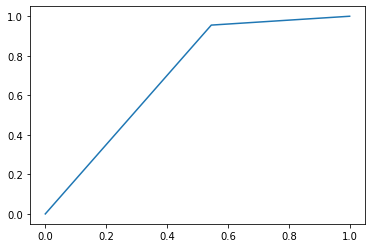

In [61]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)


In [65]:
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(X_train,y_train)
pred2=Logmodel.predict(X_test)
cm2= confusion_matrix(y_test,pred2)
score=accuracy_score(y_test,pred2)
print("Accuracy = "+str(score*100)+"%")
print("Confusion Matrix: ")
print(cm2)

Accuracy = 91.02564102564102%
Confusion Matrix: 
[[ 7  4]
 [ 3 64]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7957937584803256


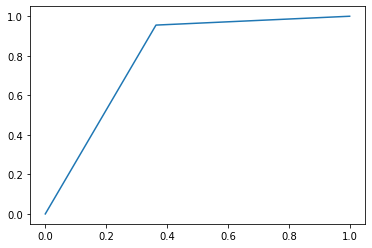

In [66]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)